For each simulation there are around 740 timesteps. For each timestep, there are 14184 nodes in the mesh.

Each node has 7 features

0. X (m)
1. Y (m)
2. Timestep
3. Pressure (Pa)
4. Velocity u (m s^-1)
5. Velocity v (m s^-1)
6. Water.Volume Fraction (%)

In [1]:
import numpy as np
import sys
np.set_printoptions(suppress=True, linewidth=np.inf, threshold=sys.maxsize) # No scientific notation

feature_names = ['X', 'Y', 'T', 'P', 'Vu', 'Vv', 'W.VF']

data = np.load('/home/jperez/data/sled350/130.npy')
print(data.shape, data.dtype)

for idx, feature_name in enumerate(feature_names):
    v = data[:, idx]
    print(f'Minimum {feature_name}: {v.min():.10f} | Maximum {feature_name}: {v.max():.10f}')

print('row 0=', data[0])
print('row 14184=', data[-1])

(14184, 7) float64
Minimum X: -0.0250000004 | Maximum X: 3.9749999000
Minimum Y: -0.0000000000 | Maximum Y: 2.2000000500
Minimum T: 130.0000000000 | Maximum T: 130.0000000000
Minimum P: -415114.8440000000 | Maximum P: 478844.4380000000
Minimum Vu: -494.3121340000 | Maximum Vu: 797.2396850000
Minimum Vv: -351.8380430000 | Maximum Vv: 654.5689090000
Minimum W.VF: 0.0000000000 | Maximum W.VF: 1.0000000000
row 0= [     0.              0.25          130.         177673.828         349.843018        0.38330859      0.        ]
row 14184= [    0.2            1.97500002   130.         26160.7344       350.451416      62.1929855      0.        ]


Visualizing using plotting

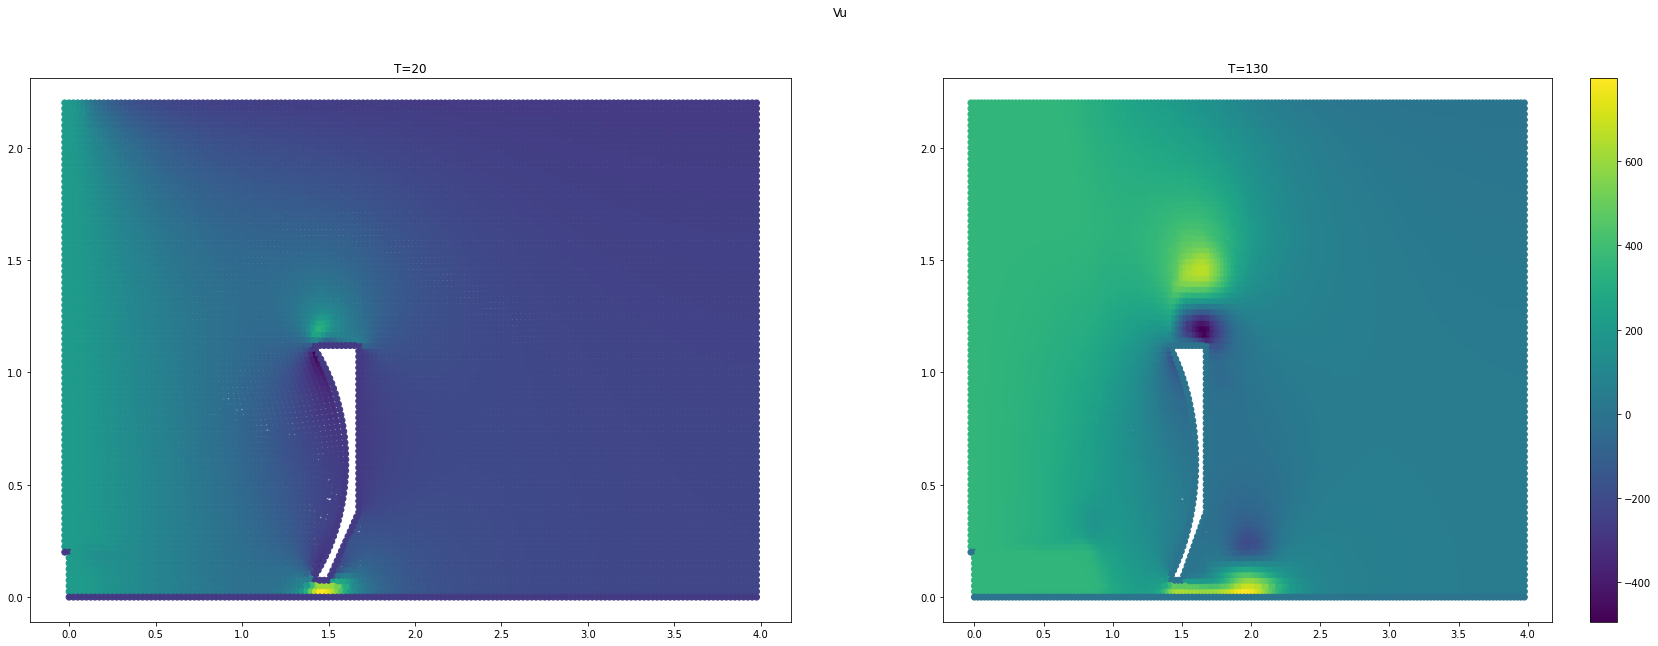

In [2]:
import matplotlib.pyplot as plt
data1 = np.load('/home/jperez/data/sled350/20.npy')
data2 = np.load('/home/jperez/data/sled350/130.npy')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 10))
plt.suptitle('Vu')
ax[0].scatter(data1[:, 0], data1[:, 1], c=data1[:, 4])
ax[0].set_title('T=20')

s = ax[1].scatter(data2[:, 0], data2[:, 1], c=data2[:, 4])
ax[1].set_title('T=130')

plt.colorbar(s)

Minimum X: -0.000000399999998 | Maximum X: 3999.999899999999798
Minimum Y: -0.000000000000484 | Maximum Y: 2200.000049999999646
Minimum T: 130.000000000000000 | Maximum T: 130.000000000000000
Minimum P: -415114.843999999982771 | Maximum P: 478844.438000000023749
Minimum Vu: -0.061653113865224 | Maximum Vu: 255.047342893106133
Minimum Vv: -351.838043000000027 | Maximum Vv: 654.568908999999962
Minimum W.VF: 0.000000000000000 | Maximum W.VF: 1.000000000000000
Image will have 88.0 rows by 160.0 cols
Factors will be 40.0 by 40.0
Image will be (89, 161)
Collision in 6,59 | [(1467.74092, 153.632939), (1480.0701399999998, 140.21661899999998)]
Collision in 6,57 | [(1419.0866, 156.885624), (1433.7458799999997, 158.826947)]
Collision in 7,59 | [(1479.7017799999999, 173.20848999999998), (1463.0265499999998, 186.84261999999998)]
Collision in 9,60 | [(1502.1618799999999, 213.827834), (1512.3393800000001, 233.472198)]
Collision in 11,60 | [(1503.1224699999998, 264.859855), (1509.0222599999997, 287.35

Text(0.5, 1.0, 'T=130')

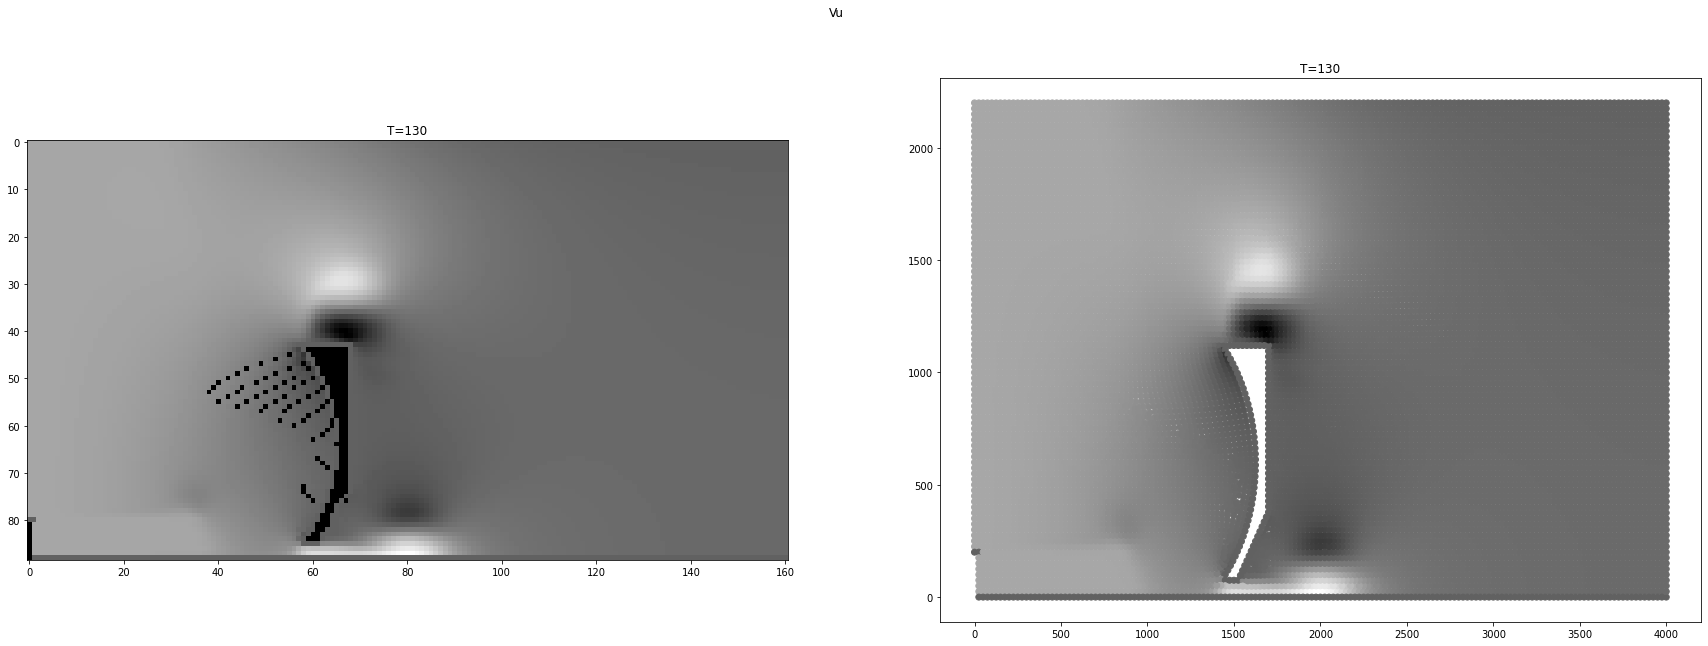

In [3]:
# X goes from 0m to 4m, needs to be shifted by 0.025
# Y goes from 0m to 2.2m
import math
from decimal import Decimal
s = 1000
data1 = np.load('/home/jperez/data/sled350/130.npy').astype(np.float64)
data1[:, 0] += 0.025
data1[:, 4] += 494
data1[:, 4] /= 1291
data1[:, 4] *= 255

data1[:, 0] *= s
data1[:, 1] *= s

# if s != 1:
#     data1 = data1.round(decimals=0).astype(np.int64)

for idx, feature_name in enumerate(feature_names):
    v = data1[:, idx]
    print(f'Minimum {feature_name}: {v.min():.15f} | Maximum {feature_name}: {v.max():.15f}')

x_max = 4 * s
y_max = 2.2 * s
step = 0.025 * s
im_rows = (y_max/step)
im_cols = (x_max/step)
print(f'Image will have {im_rows} rows by {im_cols} cols')

row_f = (im_rows/y_max)*s
col_f = (im_cols/x_max)*s
print(f'Factors will be {row_f} by {col_f}')

# Convert to integers
im_rows = int(im_rows)
im_cols = int(im_cols)
row_f = int(row_f)
col_f = int(col_f)

im = np.zeros((im_rows+1, im_cols+1), dtype=np.uint8)
# im[:, :] = [0, 255, 0]
print(f'Image will be {im.shape}')

inserted_dict = {}
total_c = 0
for x, y, vu in zip(data1[:, 0], data1[:, 1], data1[:, 4]):
    r = round((y * row_f)/s)
    c = round((x * col_f)/s)
    im[r, c] = vu

    if (r, c) in inserted_dict:
        inserted_dict[(r, c)] += [(x, y)]
        total_c += 1
        print(f'Collision in {r},{c} | {(inserted_dict[(r, c)])}')
    else:
        inserted_dict[(r, c)] = [(x, y)]

    # print(f'{y:.7f}, {x:.7f} -> {r:.3f}, {c:.3f}')

print('Total Collisions=', total_c)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 10))
plt.suptitle('Vu')
ax[0].imshow(im[::-1], cmap='gray')
ax[0].set_title('T=130')

s = ax[1].scatter(data1[:, 0], data1[:, 1], c=data1[:, 4], cmap='gray')
ax[1].set_title('T=130')

# plt.colorbar(s)
# plt.figure(figsize=(30, 10))
# plt.imshow(im[::-1], cmap='gray')
# plt.show()

Text(0.5, 1.0, 'T=130')

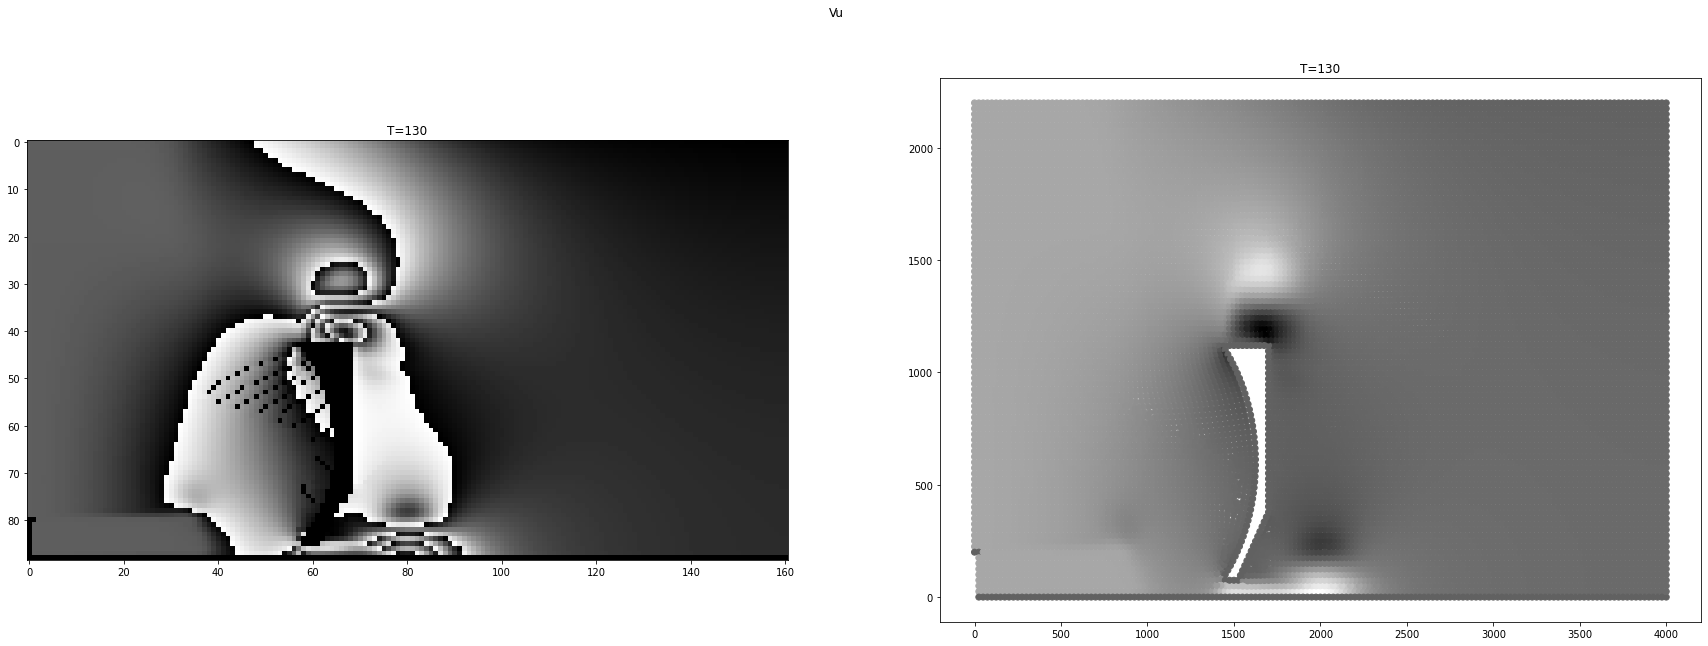

In [4]:
import data
import scaling
from pathlib import Path

im = data.read_np_2d('/home/jperez/data/sled350/130.npy')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 10))
plt.suptitle('Vu')
ax[0].imshow(im[::-1], cmap='gray')
ax[0].set_title('T=130')

s = ax[1].scatter(data1[:, 0], data1[:, 1], c=data1[:, 4], cmap='gray')
ax[1].set_title('T=130')

In [ ]:
d = {}
s = 1000
data1 = np.load('/home/jperez/data/sled350/20.npy')
data1[:, 0] += 0.025
data1[:, 0] *= s
data1[:, 1] *= s
for x, y, vu in zip(data1[:, 0], data1[:, 1], data1[:, 4]):
    d[(int(x), int(y))] = 0

c = 0
for x_coord in np.arange(0, 4, 0.025):
    for y_coord in np.arange(0, 2.2, 0.025):
        key = (int(x_coord*s), int(y_coord*s))
        if key in d:
            d[key] += 1
        else:
            c += 1
            # print(round(x_coord*s),  round(y_coord*s), 'not in D')

print(c, 'not found out of 14080')
print(f'd has {len(d.keys())}')

In [8]:
train_data[130][0].shape

(89, 161, 1)